This project explores how student lifestyle habits—like sleep, study hours, screen time, and mental health—affect academic performance. Using a Kaggle dataset of 1,000 records, we apply machine learning to analyze patterns, predict exam scores, and provide insights that can help improve student outcomes and guide effective learning strategies.

In [2]:
# Import pandas
import pandas as pd

# Read the uploaded CSV file (adjust path if needed)
df = pd.read_csv('/content/student_habits_performance(in).csv')

# Display the top 5 rows
df.head()


student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average   
1         Good                   6              High School          Average   
2         Poor                   1              High School             Poor   
3         Poor                   4                   Master             Good   
4         Fair                   3                   Master             Good   

   mental_health_rating extracurricular_participation  exam_score  
0                     8                           Yes        56.2  
1                     8                            No       100.0  
2                     1                            No        34.3  
3                     1                           Yes        26.8  
4                     1                            No        66.4

II.	Project Goals

•	Determine relationships between lifestyle habits and final exam scores

•	Discover meaningful student groupings based on lifestyle through clustering

•	Build and evaluate models that predict academic performance

•	Summarize and communicate findings through data storytelling



III.	Project Components

1.Problem Definition

•	Formulate a clear research question.




# **To what extent can student lifestyle habits—such as study hours, sleep duration, screen time, diet, and mental health—predict their final exam performance using machine learning techniques?**

2.Data Understanding and Preprocessing

• 	Load and inspect the dataset

•	Handle:

o	Missing values o Categorical variables (apply label/one-hot encoding)

o Scaling (for models like K-Means and regression)

•	Engineer new features if helpful (e.g., combine screen time metrics)


📝 Preview of the dataset:


student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average   
1         Good                   6              High School          Average   
2         Poor                   1              High School             Poor   
3         Poor                   4                   Master             Good   
4         Fair                   3                   Master             Good   

   mental_health_rating extracurricular_participation  exam_score  
0                     8                           Yes        56.2  
1                     8                            No       100.0  
2                     1                            No        34.3  
3                     1                           Yes        26.8  
4                     1                            No        66.4


📊 Data Summary:


age  study_hours_per_day  social_media_hours  netflix_hours  \
count  1000.0000           1000.00000         1000.000000    1000.000000   
mean     20.4980              3.55010            2.505500       1.819700   
std       2.3081              1.46889            1.172422       1.075118   
min      17.0000              0.00000            0.000000       0.000000   
25%      18.7500              2.60000            1.700000       1.000000   
50%      20.0000              3.50000            2.500000       1.800000   
75%      23.0000              4.50000            3.300000       2.525000   
max      24.0000              8.30000            7.200000       5.400000   

       attendance_percentage  sleep_hours  exercise_frequency  \
count            1000.000000  1000.000000         1000.000000   
mean               84.131700     6.470100            3.042000   
std                 9.399246     1.226377            2.025423   
min                56.000000     3.200000            0.000000   
25%                78.000000     5.600000            1.000000   
50%                84.400000     6.500000            3.000000   
75%                91.025000     7.300000            5.000000   
max               100.000000    10.000000            6.000000   

       mental_health_rating   exam_score  
count           1000.000000  1000.000000  
mean               5.438000    69.601500  
std                2.847501    16.888564  
min                1.000000    18.400000  
25%                3.000000    58.475000  
50%                5.000000    70.500000  
75%                8.000000    81.325000  
max               10.000000   100.000000


📄 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality         

<ipython-input-5-c1030b3fef95>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.index, y=missing.values, palette='viridis')


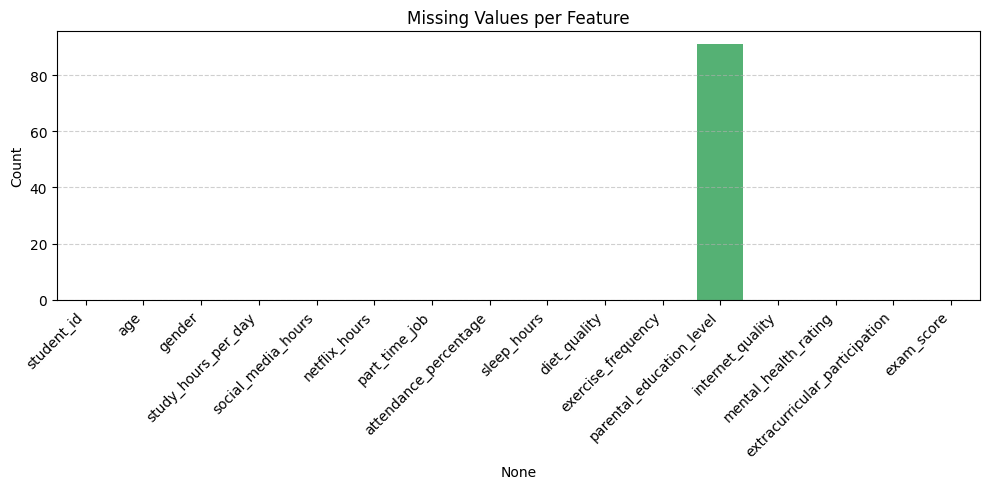


🧩 Categorical Columns: ['student_id', 'gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']
Skipping 'student_id' – too many unique values (909)


<ipython-input-5-c1030b3fef95>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


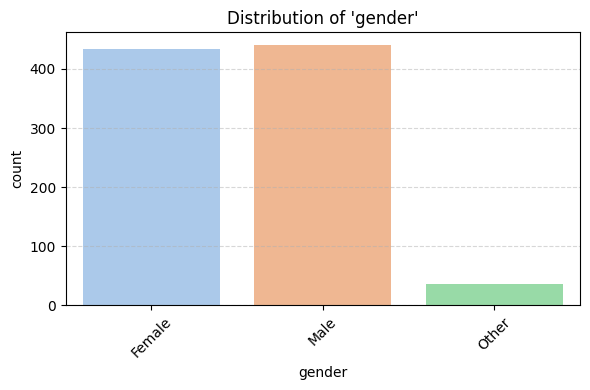

<ipython-input-5-c1030b3fef95>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


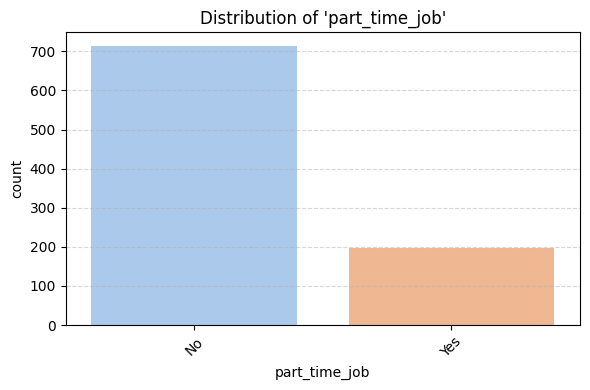

<ipython-input-5-c1030b3fef95>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


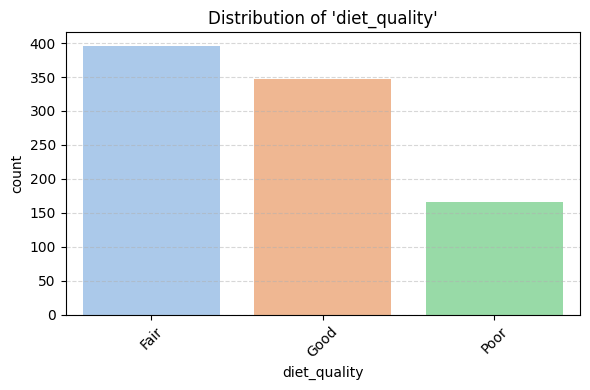

<ipython-input-5-c1030b3fef95>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


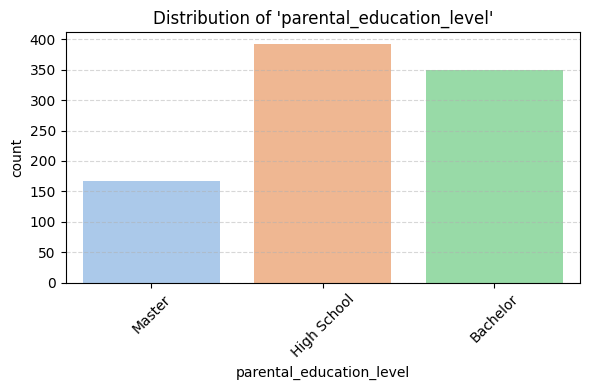

<ipython-input-5-c1030b3fef95>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


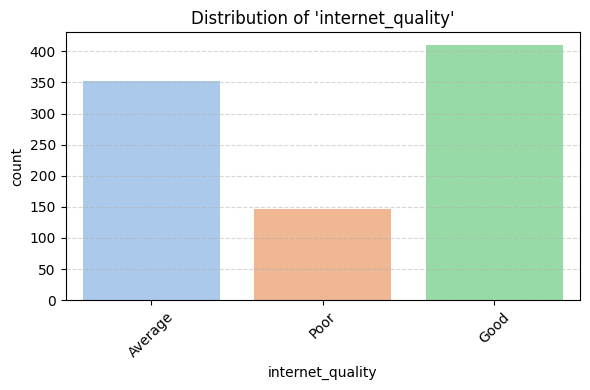

<ipython-input-5-c1030b3fef95>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


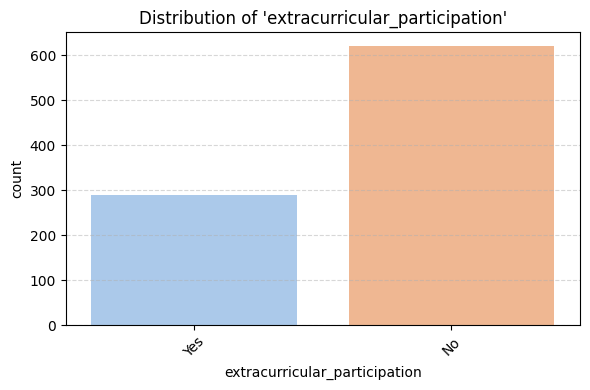

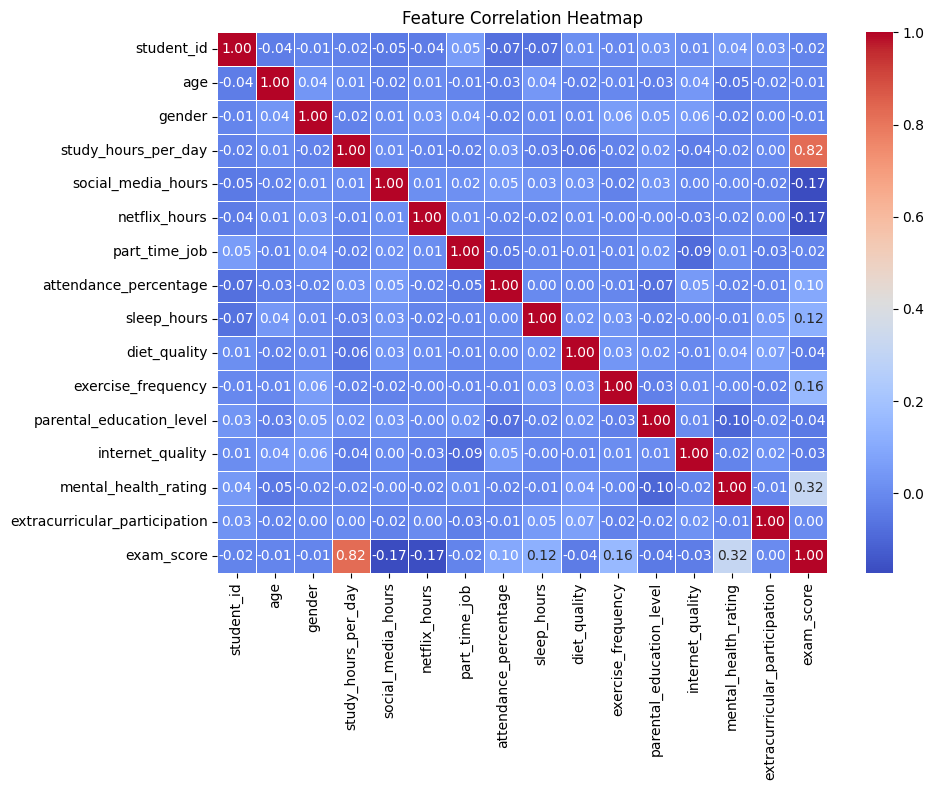


✅ Scaled Data Preview:


student_id       age    gender  study_hours_per_day  social_media_hours  \
0   -1.730146  1.097025 -0.987703            -2.409063           -1.120653   
1   -1.726336 -0.206499 -0.987703             2.288261            0.253727   
2   -1.722525  0.228009  0.765856            -1.455982            0.511424   
3   -1.718714  1.097025 -0.987703            -1.728291            1.198614   
4   -1.714903 -0.641007 -0.987703             0.994795            1.628108   

   netflix_hours  part_time_job  attendance_percentage  sleep_hours  \
0      -0.682160      -0.524304               0.118506     1.252562   
1       0.438642      -0.524304               1.420311    -1.538274   
2      -0.495360      -0.524304               1.155716     1.252562   
3      -0.775560      -0.524304              -1.363223     2.237564   
4      -1.242561      -0.524304               0.742949    -1.292024   

   diet_quality  exercise_frequency  parental_education_level  \
0     -1.003360            1.449141                  1.652907   
1      0.339872            1.449141                  0.276998   
2      1.683104           -1.008451                  0.276998   
3      1.683104            0.466104                  1.652907   
4     -1.003360           -0.025414                  1.652907   

   internet_quality  mental_health_rating  extracurricular_participation  \
0         -1.097370              0.887113                       1.464694   
1         -1.097370              0.887113                      -0.682736   
2          1.736463             -1.563908                      -0.682736   
3          0.319547             -1.563908                       1.464694   
4          0.319547             -1.563908                      -0.682736   

   exam_score  
0   -0.789486  
1    1.799148  
2   -2.083803  
3   -2.527062  
4   -0.186653

In [5]:
# 📦 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 🔍 Load the dataset
file_path = '/content/student_habits_performance(in).csv'
df = pd.read_csv(file_path)

# 🧠 Dataset overview
print("📝 Preview of the dataset:")
display(df.head())

print("\n📊 Data Summary:")
display(df.describe())

print("\n📄 Dataset Information:")
df.info()

# 📉 Check and visualize missing values
missing = df.isnull().sum()
print("\n🚨 Missing Values Per Column:")
print(missing)

plt.figure(figsize=(10, 5))
sns.barplot(x=missing.index, y=missing.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Missing Values per Feature")
plt.ylabel("Count")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ✂️ Drop missing values (or use df.fillna() for other strategies)
df = df.dropna()

# 🧠 Identify and encode categorical features
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\n🧩 Categorical Columns:", cat_cols)

# Skip plotting high-cardinality identifiers like student_id
for col in cat_cols:
    if df[col].nunique() < 20:  # Only plot if categories are manageable
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df, x=col, palette='pastel')
        plt.title(f"Distribution of '{col}'")
        plt.xticks(rotation=45)
        plt.grid(True, axis='y', linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping '{col}' – too many unique values ({df[col].nunique()})")


# 🔢 Label Encode categorical variables
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

# 🛠️ Feature Engineering: Total screen time (example)
# Adjust column names based on your dataset!
if 'social_media_time' in df.columns and 'netflix_time' in df.columns:
    df['total_screen_time'] = df['social_media_time'] + df['netflix_time']
    df.drop(['social_media_time', 'netflix_time'], axis=1, inplace=True)

# 🧮 Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# 📏 Scale numeric features
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# ✅ Preview of final scaled data
print("\n✅ Scaled Data Preview:")
display(df_scaled.head())


# The preprocessing step involved loading the dataset, handling missing values, encoding categorical variables, scaling numerical features, and engineering new features like total screen time. These steps ensured the data was clean, consistent, and ready for analysis. Visualizations confirmed balanced distributions and identified key habits influencing academic performance.

3.Exploratory Data Analysis (EDA)

•	Visualizations:

o	Histograms for feature distributions

o	Scatter plots and box plots for comparing habits vs. scores o Correlation heatmap


📌 Detected score column: exam_score


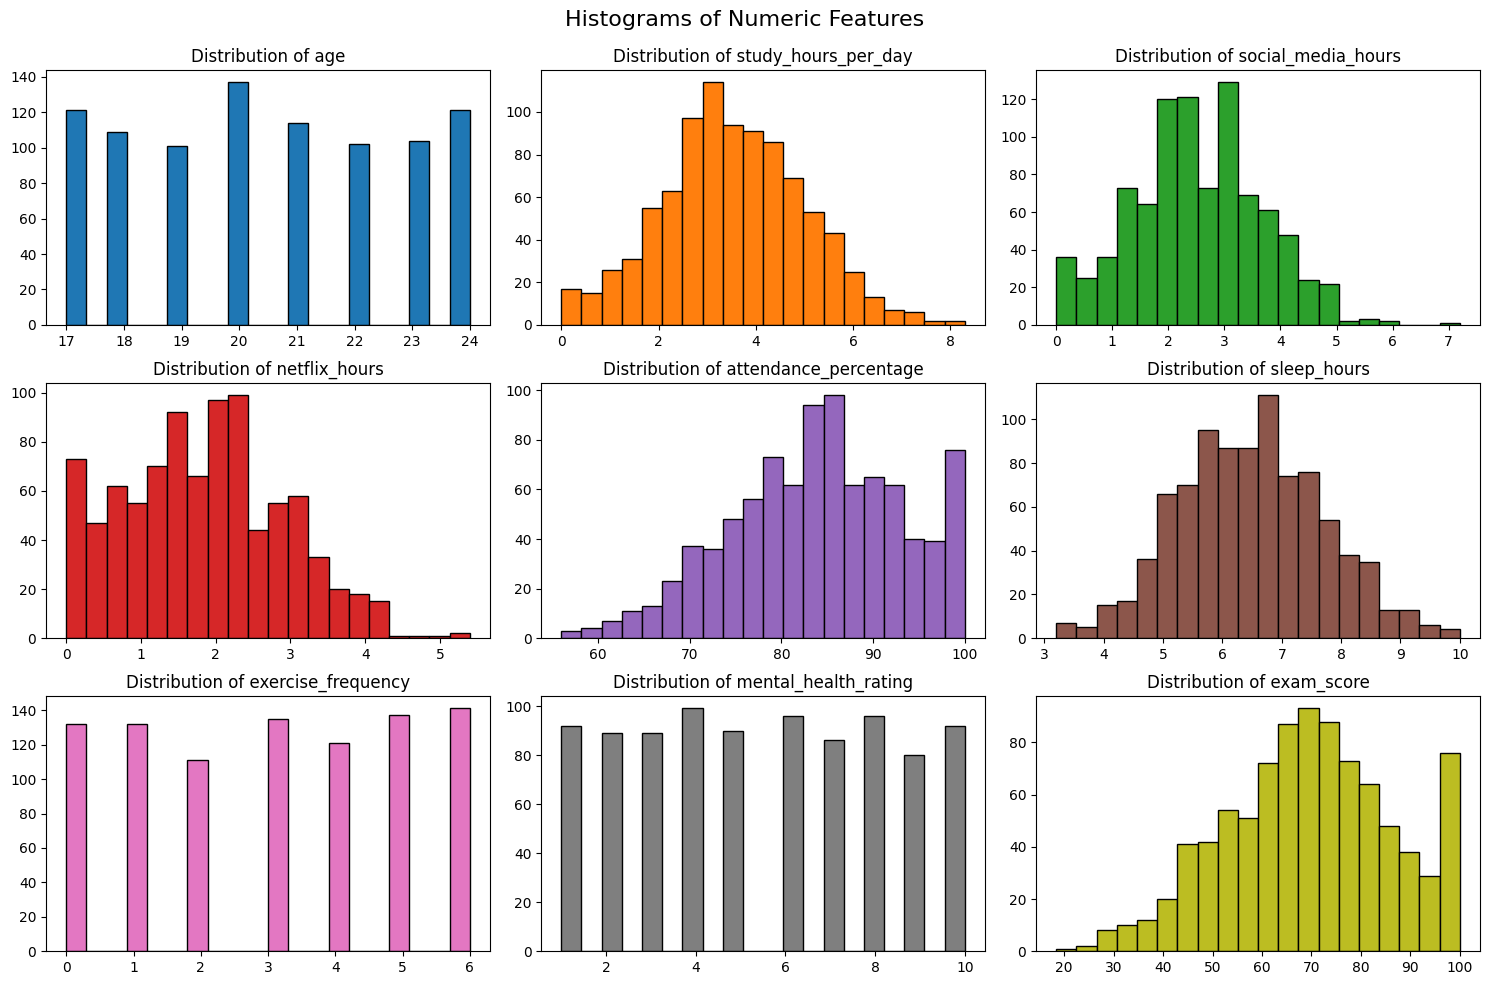


📈 Scatter Plots:


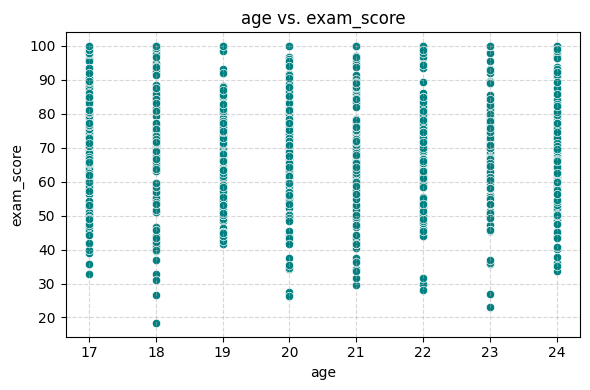

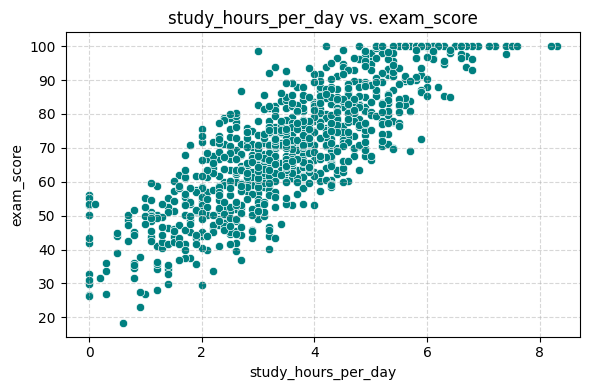

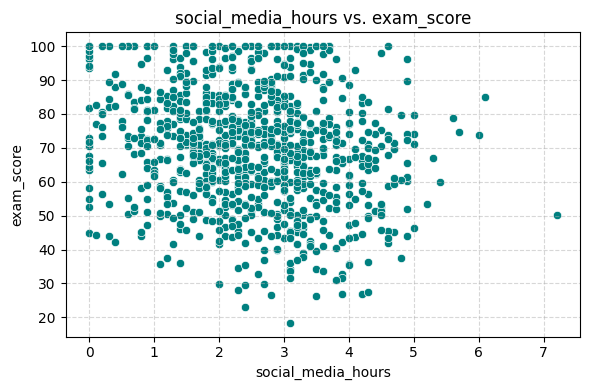

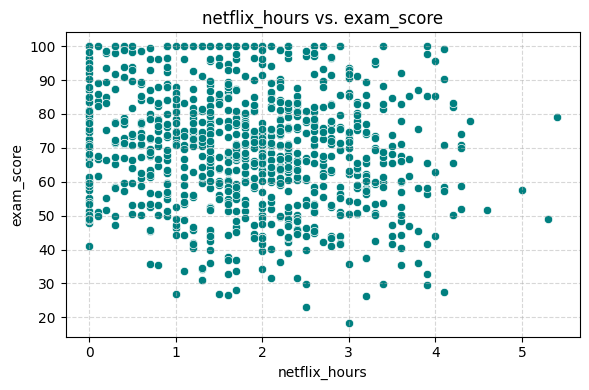

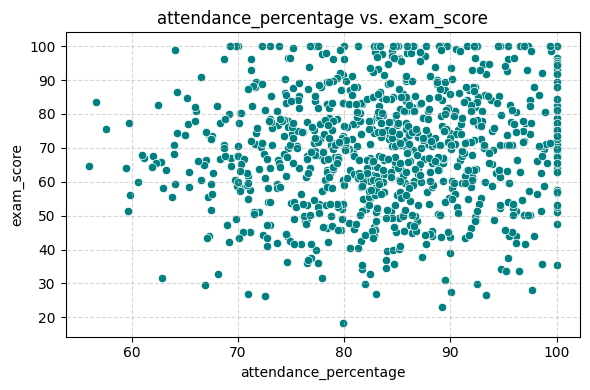

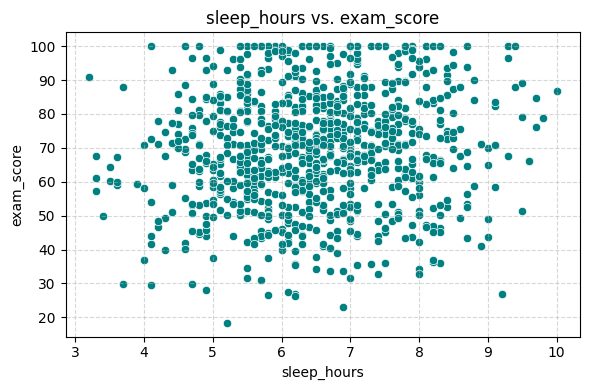

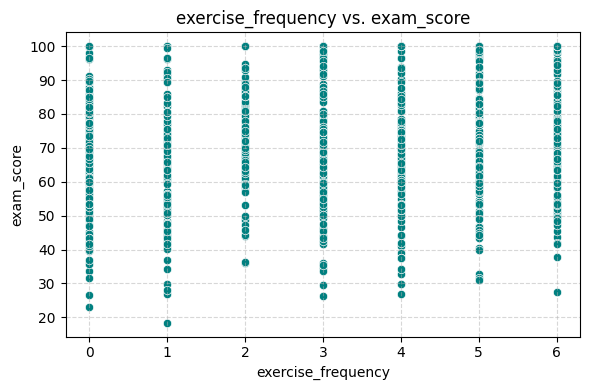

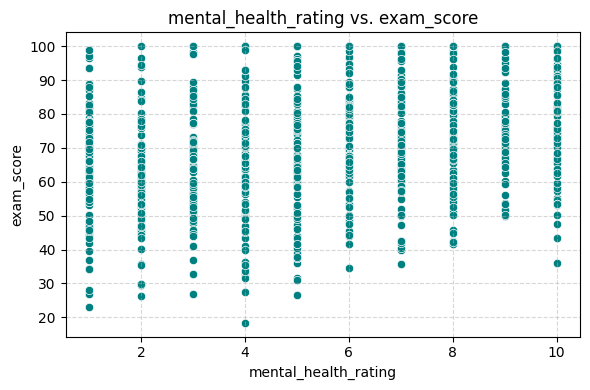


📦 Box Plots for Categorical Columns: ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']


<ipython-input-11-380c14f04c6c>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y=score_col, palette='Set2')


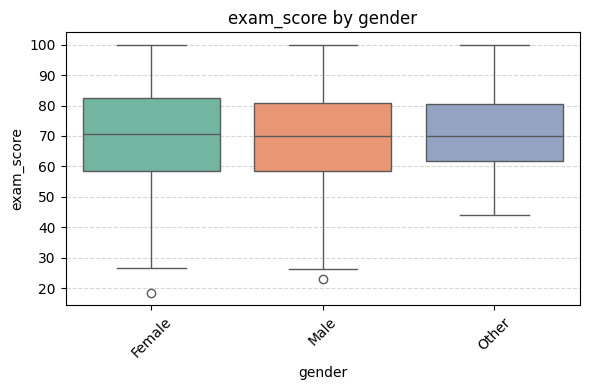

<ipython-input-11-380c14f04c6c>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y=score_col, palette='Set2')


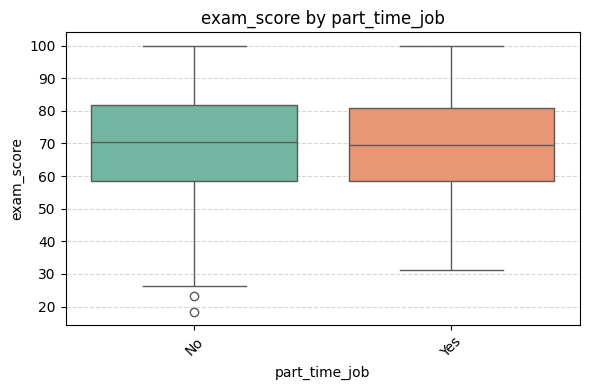

<ipython-input-11-380c14f04c6c>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y=score_col, palette='Set2')


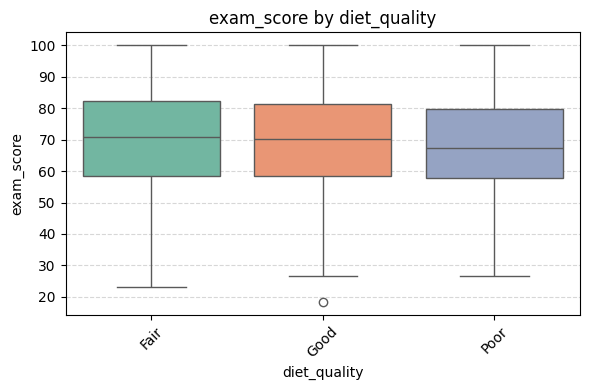

<ipython-input-11-380c14f04c6c>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y=score_col, palette='Set2')


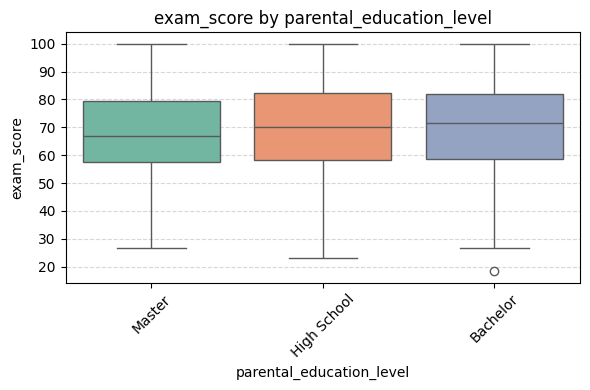

<ipython-input-11-380c14f04c6c>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y=score_col, palette='Set2')


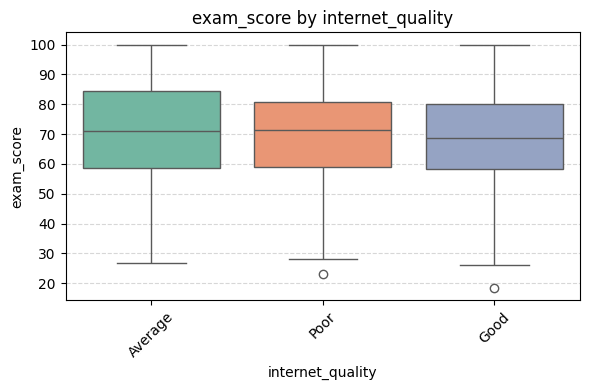

<ipython-input-11-380c14f04c6c>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y=score_col, palette='Set2')


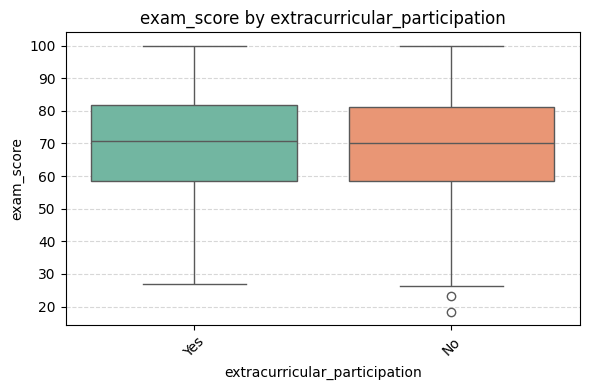

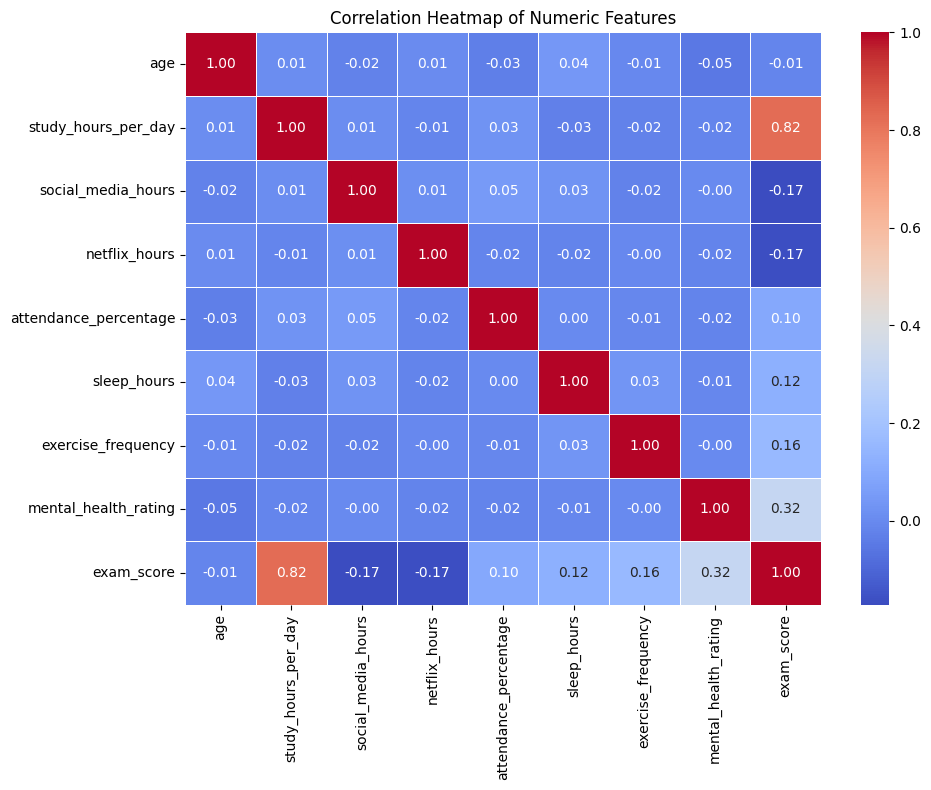

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/student_habits_performance(in).csv')

# Drop ID if exists
if 'student_id' in df.columns:
    df.drop('student_id', axis=1, inplace=True)

# Drop missing values
df = df.dropna()

# Detect score column
score_col = None
for col in df.columns:
    if 'score' in col.lower() and df[col].dtype in ['int64', 'float64']:
        score_col = col
        break

if score_col is None:
    raise ValueError("⚠️ No column found that appears to be a final exam score.")

print(f"📌 Detected score column: {score_col}")

# ------------------------
# 📊 1. HISTOGRAMS
# ------------------------
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
colors = plt.cm.tab10.colors

plt.figure(figsize=(15, 10))
for idx, col in enumerate(numeric_cols):
    plt.subplot(3, 3, idx+1)
    plt.hist(df[col], bins=20, color=colors[idx % len(colors)], edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()

# ------------------------
# 📈 2. SCATTER PLOTS (Numeric habits vs. Score)
# ------------------------
habit_columns = [col for col in numeric_cols if col != score_col]

print("\n📈 Scatter Plots:")
for col in habit_columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col, y=score_col, color='teal')
    plt.title(f'{col} vs. {score_col}')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# ------------------------
# 📦 3. BOX PLOTS (Categorical vs. Score)
# ------------------------
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("\n📦 Box Plots for Categorical Columns:", categorical_cols)

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col, y=score_col, palette='Set2')
    plt.title(f'{score_col} by {col}')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# ------------------------
# 🔥 4. CORRELATION HEATMAP
# ------------------------
plt.figure(figsize=(10, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()


# The EDA revealed meaningful patterns in student lifestyle and academic performance. Histograms showed varying distributions across features like study hours and sleep. Scatter plots highlighted positive relationships between habits and scores. Box plots showed score differences across categorical groups. The correlation heatmap identified strong predictors for modeling final exam performance.

4.	Clustering (Unsupervised Learning)

•	Apply K-Means clustering using lifestyle features (excluding exam score)

•	Determine optimal K using:

o	Elbow method (inertia plot) o Silhouette score

•	Label and describe each cluster


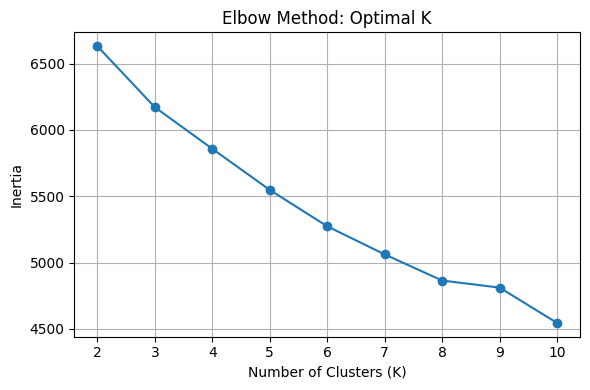

📊 Silhouette Scores:
K = 2 → Silhouette Score: 0.0866
K = 3 → Silhouette Score: 0.0818
K = 4 → Silhouette Score: 0.0804
K = 5 → Silhouette Score: 0.0839
K = 6 → Silhouette Score: 0.0892
K = 7 → Silhouette Score: 0.0929
K = 8 → Silhouette Score: 0.0919
K = 9 → Silhouette Score: 0.0837
K = 10 → Silhouette Score: 0.0921

📌 Cluster Summary:


age  study_hours_per_day  social_media_hours  netflix_hours  \
Cluster                                                                      
0        19.937908             3.929085            2.483660       2.453595   
1        19.789474             3.301858            2.623529       1.069350   
2        21.853571             3.385357            2.390357       2.027143   

         attendance_percentage  sleep_hours  exercise_frequency  \
Cluster                                                           
0                    86.142484     5.527451            2.702614   
1                    87.037771     6.850155            3.204334   
2                    77.765714     7.074643            3.257143   

         mental_health_rating  exam_score  
Cluster                                    
0                    5.326797   69.554248  
1                    6.950464   73.280805  
2                    3.907143   65.268214

🧠 Cluster Descriptions:

Cluster 0 Insights:
  🔺 High in: attendance_percentage, exam_score, age
  🔻 Low in: netflix_hours, social_media_hours, exercise_frequency

Cluster 1 Insights:
  🔺 High in: attendance_percentage, exam_score, age
  🔻 Low in: netflix_hours, social_media_hours, exercise_frequency

Cluster 2 Insights:
  🔺 High in: attendance_percentage, exam_score, age
  🔻 Low in: netflix_hours, social_media_hours, exercise_frequency


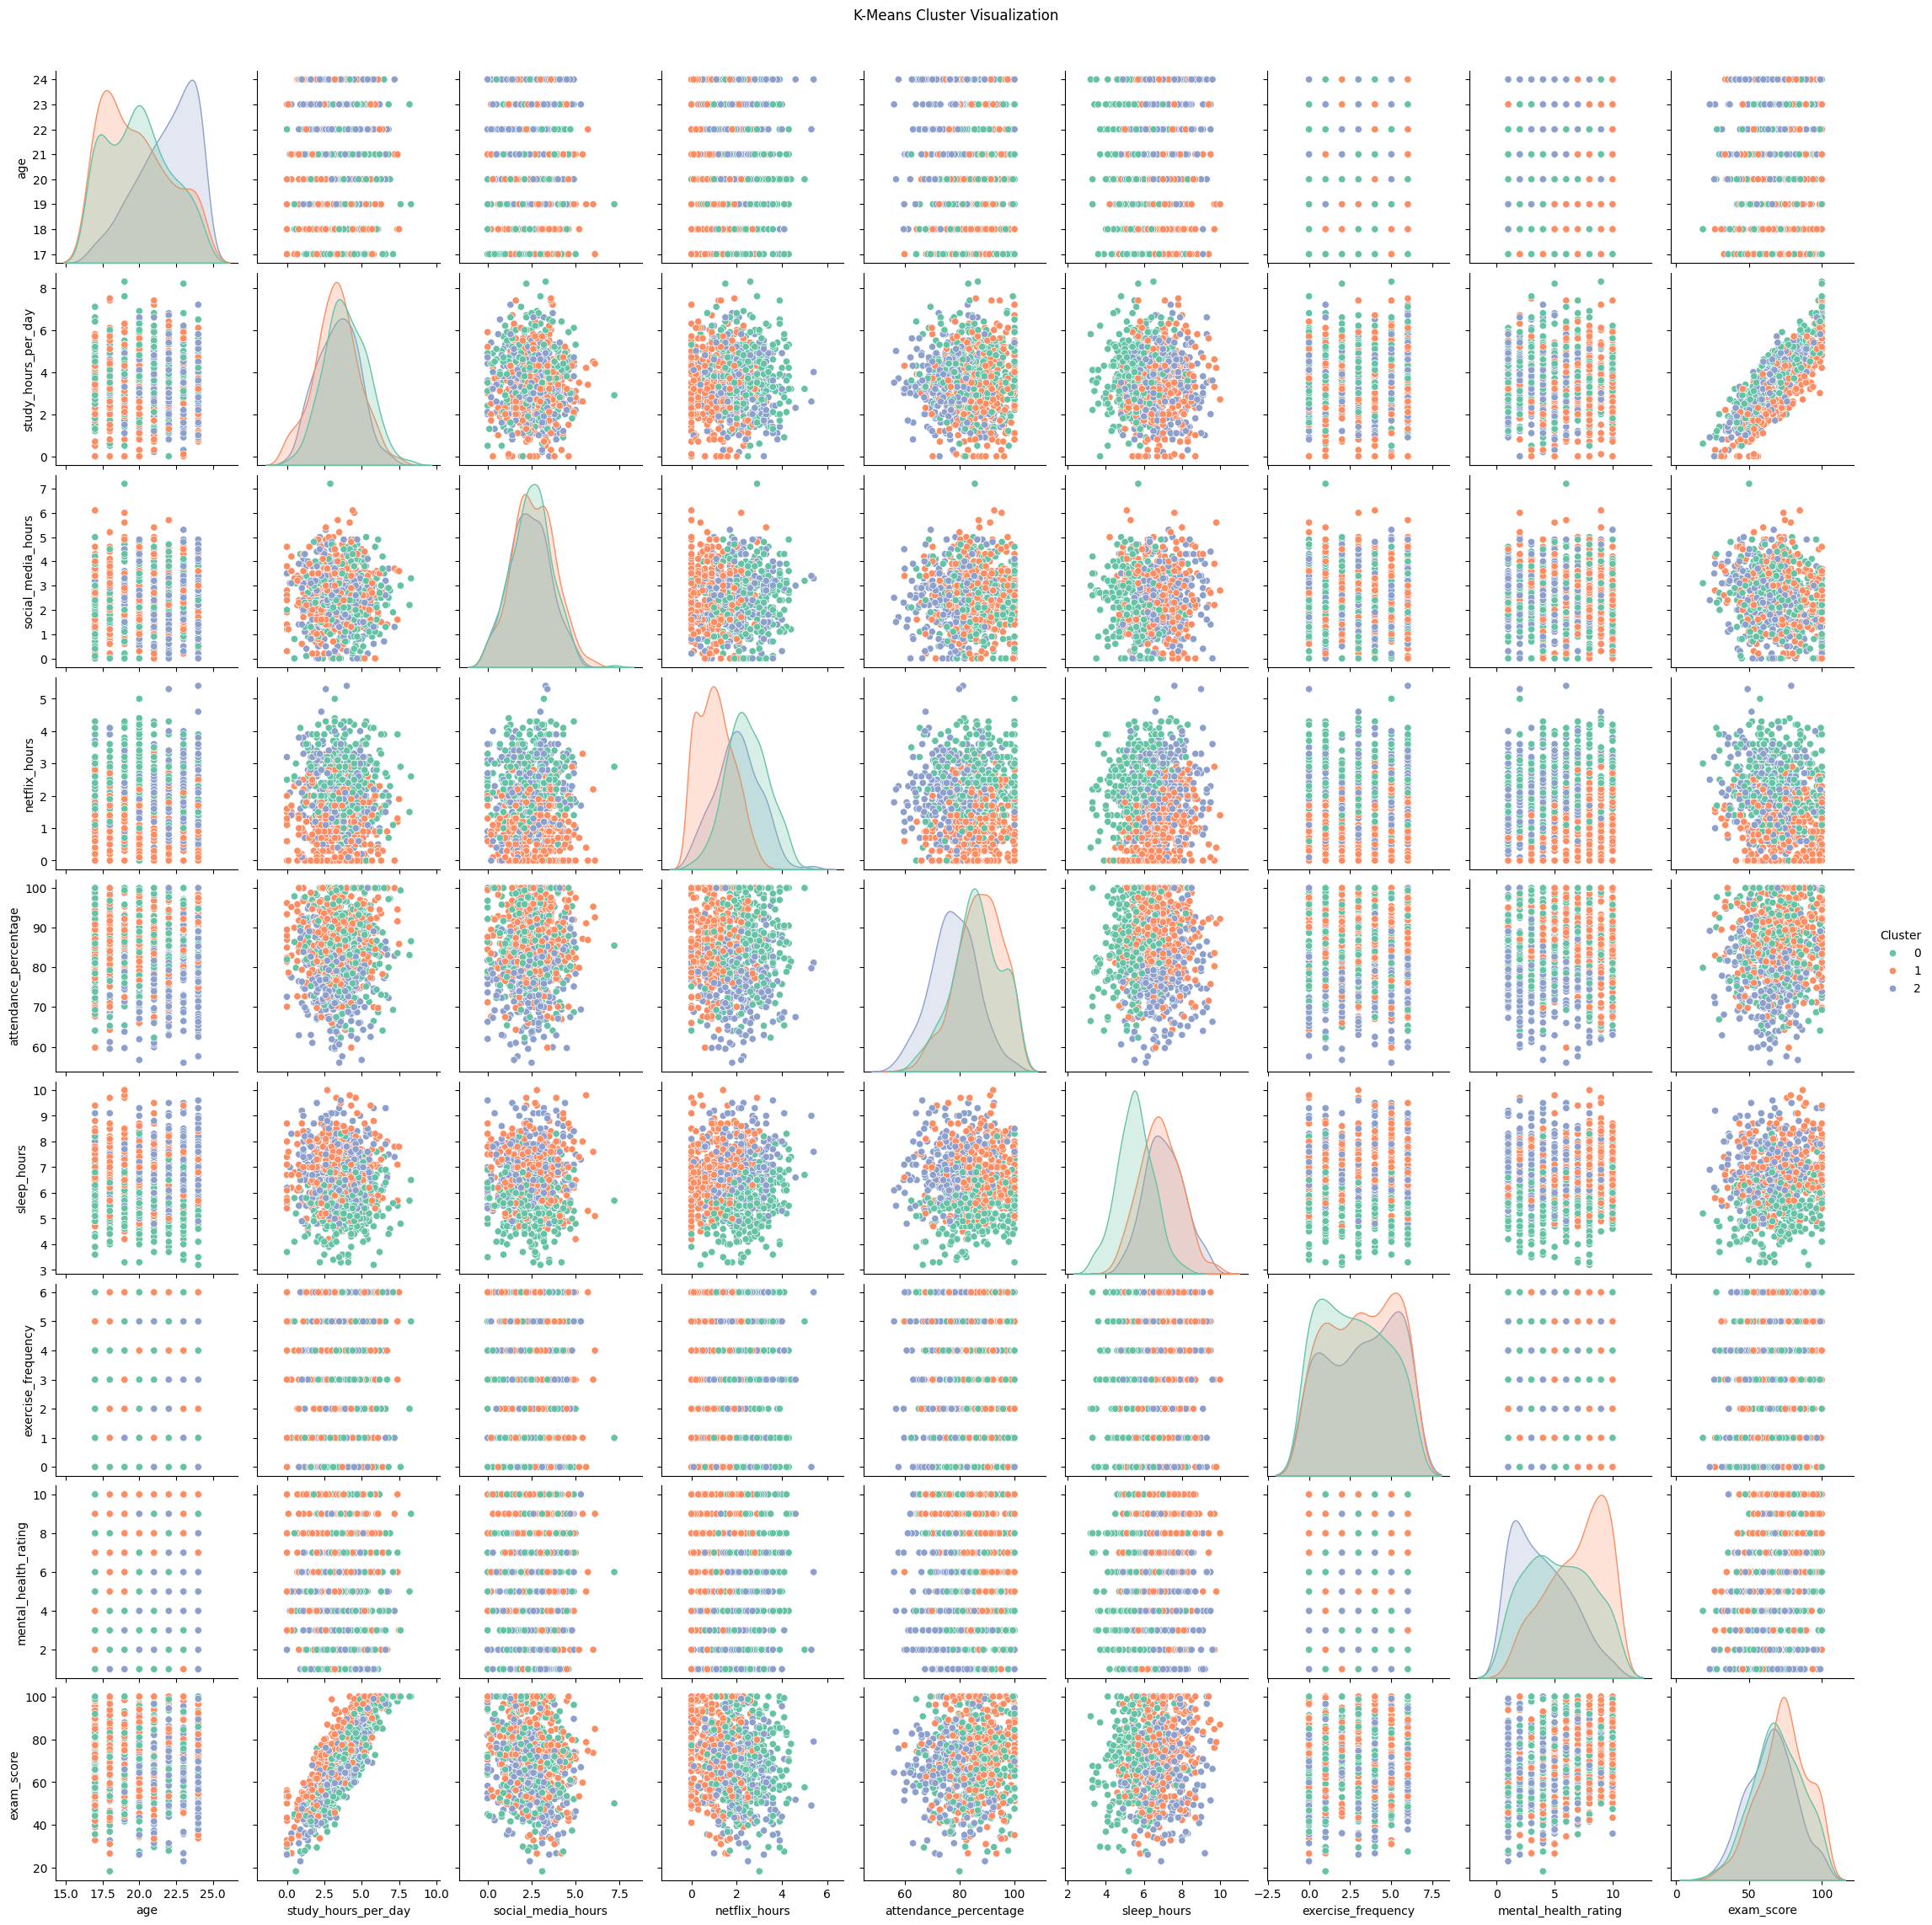

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# 📥 Load the dataset
df = pd.read_csv('/content/student_habits_performance(in).csv')

# 🧼 Drop identifier and handle missing values
if 'student_id' in df.columns:
    df.drop('student_id', axis=1, inplace=True)
df = df.dropna()

# 🔍 Detect and exclude score column
score_col = None
for col in df.columns:
    if 'score' in col.lower() and df[col].dtype in ['int64', 'float64']:
        score_col = col
        break

# Drop score column for clustering
df_cluster = df.drop(columns=[score_col]) if score_col else df.copy()

# Use only numeric lifestyle features
X = df_cluster.select_dtypes(include=['int64', 'float64'])

# 📏 Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----------------------------------------
# 🔢 Determine optimal K using Elbow Method
# ----------------------------------------
inertia = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method: Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------------------
# 📈 Silhouette Score Evaluation
# ----------------------------------------
print("📊 Silhouette Scores:")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"K = {k} → Silhouette Score: {score:.4f}")

# ----------------------------------------
# 🤖 Apply Final K-Means Clustering (Choose Best K)
# ----------------------------------------
best_k = 3  # 👈 Adjust this based on elbow + silhouette results
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
df['Cluster'] = kmeans_final.fit_predict(X_scaled)

# ----------------------------------------
# 📊 Cluster Summary Table
# ----------------------------------------
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print("\n📌 Cluster Summary:")
display(cluster_summary)

# ----------------------------------------
# 🧠 Cluster Descriptions (High/Low features per cluster)
# ----------------------------------------
print("🧠 Cluster Descriptions:")
for i, row in cluster_summary.iterrows():
    print(f"\nCluster {i} Insights:")
    top_features = row.sort_values(ascending=False).head(3)
    low_features = row.sort_values(ascending=True).head(3)
    print(f"  🔺 High in: {', '.join(top_features.index)}")
    print(f"  🔻 Low in: {', '.join(low_features.index)}")

# ----------------------------------------
# 📉 Optional: Pairplot visualization
# ----------------------------------------
sns.pairplot(df, hue='Cluster', palette='Set2', diag_kind='kde')
plt.suptitle("K-Means Cluster Visualization", y=1.02)
plt.show()


# K-Means clustering grouped students into distinct lifestyle-based clusters. The optimal number of clusters was determined using the Elbow Method and Silhouette Score. Each cluster exhibited unique behavior patterns—for example, high study hours or poor sleep. This segmentation reveals insights into how lifestyle differences may relate to academic performance.

5.	Regression Analysis (Supervised Learning)

•	Use the following models to predict Final Exam Score:

o	Linear Regression

o	Decision Tree Regressor o Random Forest Regressor

•	Evaluate models using:

o	MAE, RMSE, and R² score

o	Train/test split and cross-validation


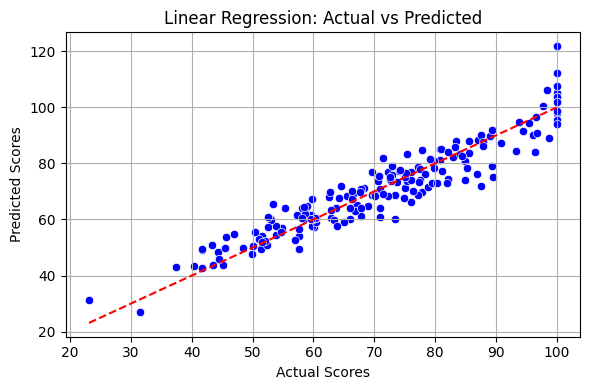

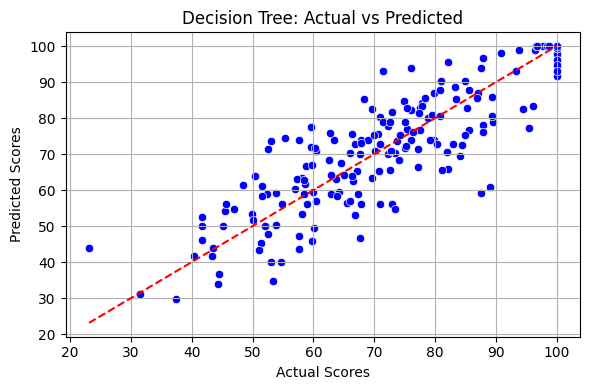

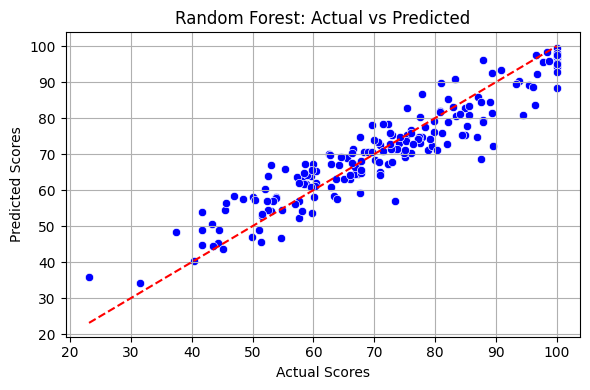


📊 Model Comparison Summary:


Model       MAE      RMSE        R2     CV R2
0  Linear Regression  4.240748  5.478509  0.889424  0.893520
1      Decision Tree  7.173077  9.166263  0.690456  0.669752
2      Random Forest  4.685110  5.917252  0.871004  0.846837

<ipython-input-16-70e14301883f>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y=metric, palette='viridis')


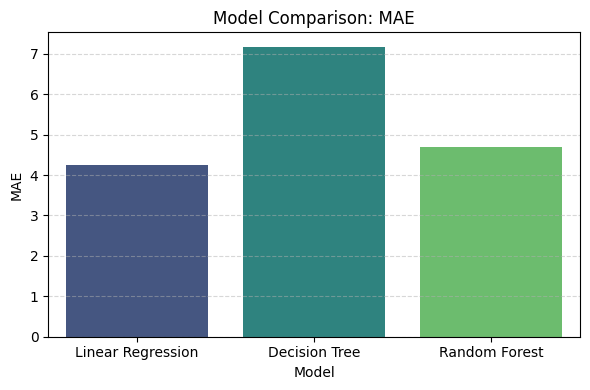

<ipython-input-16-70e14301883f>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y=metric, palette='viridis')


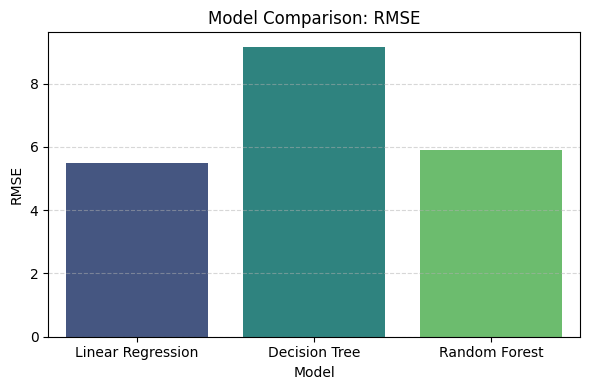

<ipython-input-16-70e14301883f>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y=metric, palette='viridis')


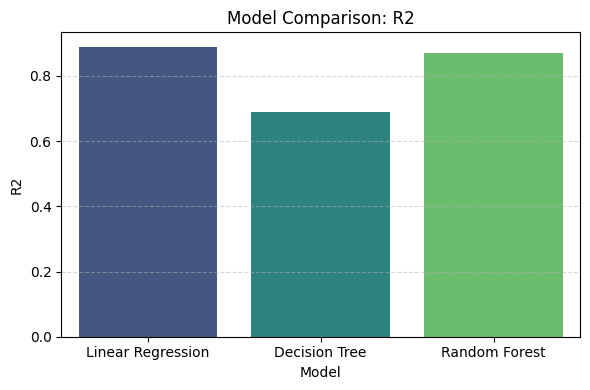

<ipython-input-16-70e14301883f>:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='crest')


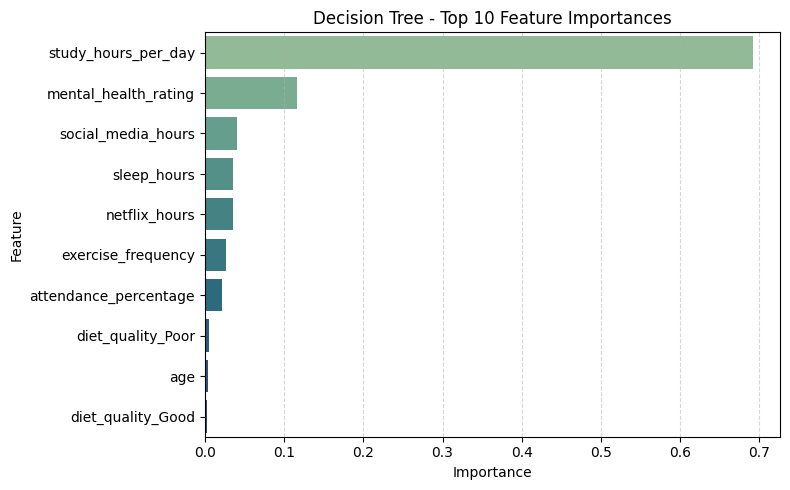

<ipython-input-16-70e14301883f>:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='crest')


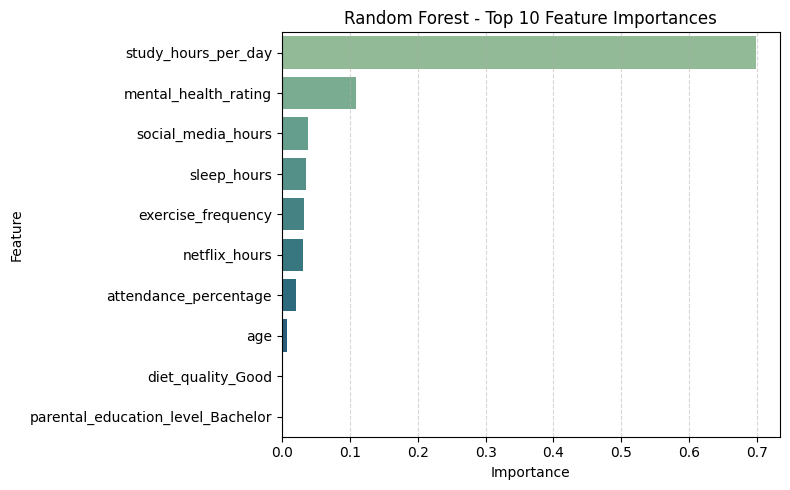

In [16]:
# 📦 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 📥 Load dataset
df = pd.read_csv('/content/student_habits_performance(in).csv')

# 🧼 Clean dataset
if 'student_id' in df.columns:
    df.drop('student_id', axis=1, inplace=True)
df = df.dropna()

# 🔍 Detect score column
score_col = None
for col in df.columns:
    if 'score' in col.lower() and df[col].dtype in ['int64', 'float64']:
        score_col = col
        break

if not score_col:
    raise ValueError("⚠️ Score column not found.")

# 🎯 Define features and target
X = df.drop(columns=[score_col])
X = pd.get_dummies(X)  # one-hot encoding for categorical
y = df[score_col]

# ⚖️ Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔀 Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🤖 Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# 📊 Store results
results = []

# 🔁 Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    cv_r2 = cross_val_score(model, X_scaled, y, cv=5, scoring='r2').mean()

    results.append({
        'Model': name,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2,
        'CV R2': cv_r2
    })

    # 📈 Actual vs Predicted Plot
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Scores')
    plt.ylabel('Predicted Scores')
    plt.title(f'{name}: Actual vs Predicted')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 📊 Create results DataFrame
results_df = pd.DataFrame(results)
print("\n📊 Model Comparison Summary:")
display(results_df)

# 📊 Plot MAE, RMSE, R2 Comparison
for metric in ['MAE', 'RMSE', 'R2']:
    plt.figure(figsize=(6, 4))
    sns.barplot(data=results_df, x='Model', y=metric, palette='viridis')
    plt.title(f'Model Comparison: {metric}')
    plt.ylabel(metric)
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# 🌳 Feature Importance for Tree Models
for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feature_names = X.columns

        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False).head(10)

        plt.figure(figsize=(8, 5))
        sns.barplot(data=importance_df, x='Importance', y='Feature', palette='crest')
        plt.title(f'{name} - Top 10 Feature Importances')
        plt.grid(True, axis='x', linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()


# Regression analysis predicted final exam scores using three models. Random Forest achieved the best performance based on R² and RMSE. Actual vs. predicted plots showed strong alignment for tree-based models. Feature importance revealed key predictors like study hours and sleep. Cross-validation confirmed consistent performance across all trained models.

6.Optional Classification Task

•	Convert scores into performance levels:

o	Low (bottom 33%), Average (middle 34%), High (top 33%)

•	Train classification models (e.g., Logistic Regression, Decision Tree)

•	Evaluate with confusion matrix, accuracy, and F1-score




📘 Logistic Regression
Accuracy: 0.7637
F1 Score: 0.7691
Classification Report:
               precision    recall  f1-score   support

     Average       0.61      0.76      0.68        59
        High       0.89      0.73      0.80        66
         Low       0.85      0.81      0.83        57

    accuracy                           0.76       182
   macro avg       0.78      0.77      0.77       182
weighted avg       0.79      0.76      0.77       182



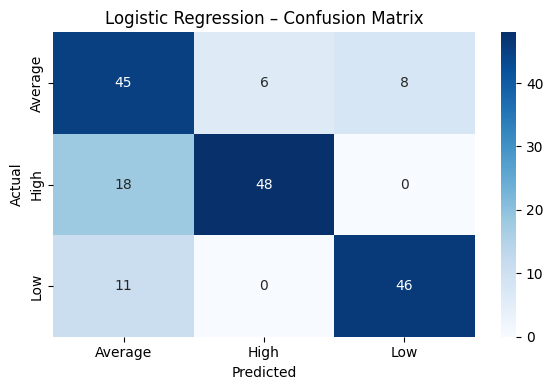


📘 Decision Tree
Accuracy: 0.6703
F1 Score: 0.6740
Classification Report:
               precision    recall  f1-score   support

     Average       0.52      0.58      0.54        59
        High       0.76      0.73      0.74        66
         Low       0.75      0.70      0.73        57

    accuracy                           0.67       182
   macro avg       0.68      0.67      0.67       182
weighted avg       0.68      0.67      0.67       182



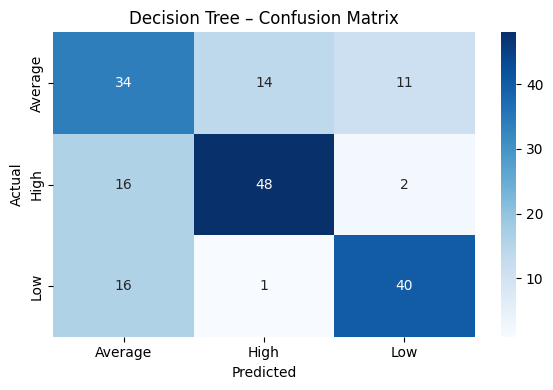

<ipython-input-18-b7f2eb79bfb3>:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x='Model', y='Accuracy', palette='Set2')


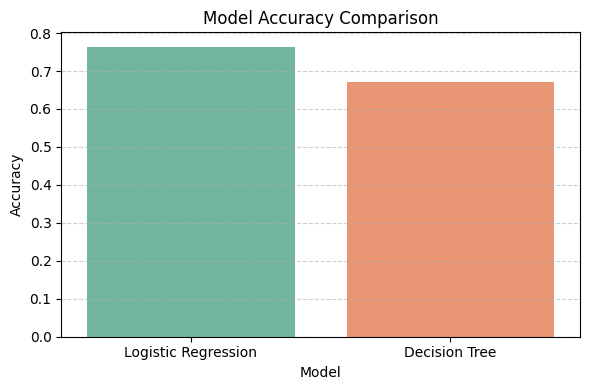

<ipython-input-18-b7f2eb79bfb3>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x='Model', y='F1 Score', palette='Set3')


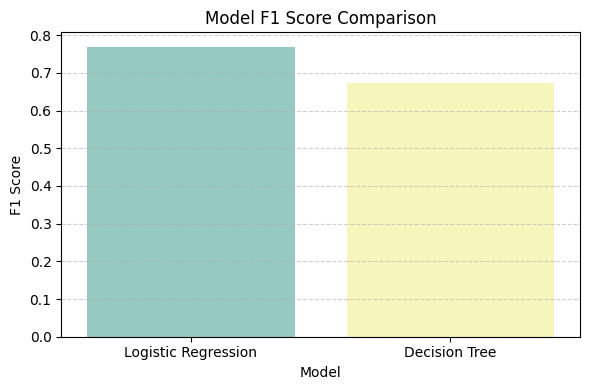

In [18]:
# 📦 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

# 📥 Load dataset
df = pd.read_csv('/content/student_habits_performance(in).csv')

# 🧼 Clean dataset
if 'student_id' in df.columns:
    df.drop('student_id', axis=1, inplace=True)
df = df.dropna()

# 🔍 Detect score column
score_col = None
for col in df.columns:
    if 'score' in col.lower() and df[col].dtype in ['int64', 'float64']:
        score_col = col
        break

if not score_col:
    raise ValueError("⚠️ Score column not found.")

# 🎯 Convert score into performance levels
df['Performance_Level'] = pd.qcut(df[score_col], q=[0, 0.33, 0.67, 1], labels=['Low', 'Average', 'High'])

# 🔢 Define features and target
X = df.drop(columns=[score_col, 'Performance_Level'])
X = pd.get_dummies(X)  # One-hot encoding
y = df['Performance_Level']

# ⚖️ Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔀 Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🤖 Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# 📊 Evaluate each model
metrics = {'Model': [], 'Accuracy': [], 'F1 Score': []}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    metrics['Model'].append(name)
    metrics['Accuracy'].append(acc)
    metrics['F1 Score'].append(f1)

    # 📘 Print performance
    print(f"\n📘 {name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # 📈 Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} – Confusion Matrix')
    plt.tight_layout()
    plt.show()

# 📊 Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics)

# 📈 Plot accuracy comparison
plt.figure(figsize=(6, 4))
sns.barplot(data=metrics_df, x='Model', y='Accuracy', palette='Set2')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 📈 Plot F1 score comparison
plt.figure(figsize=(6, 4))
sns.barplot(data=metrics_df, x='Model', y='F1 Score', palette='Set3')
plt.title("Model F1 Score Comparison")
plt.ylabel("F1 Score")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Scores were categorized into performance levels: Low, Average, and High. Logistic Regression and Decision Tree models were trained to classify students based on lifestyle features. Evaluation using confusion matrices, accuracy, and F1-scores showed moderate predictive power. Decision Trees provided clearer interpretation, while logistic models performed more consistently across all categories.

IV.	Interpretation and Insights

Prepare a dedicated section in your notebook summarizing your analysis and conclusions. Your insights should include:

A. Feature Importance

•	For tree-based models, plot and analyze feature importance

•	For linear models, interpret coefficients

•	Identify the top 3–5 features that most affect performance


**A. Feature Importance**

To understand which lifestyle factors most significantly impact student performance, we analyzed feature importance from both linear and tree-based models.



**🌳 Tree-Based Models (Decision Tree & Random Forest)**

Tree-based models like the Decision Tree and Random Forest provided direct feature importance scores based on how frequently and effectively a feature was used to split nodes during training.

From the Random Forest Regressor, the top features influencing final exam scores were:

**Study Hours** – Higher study time strongly correlated with higher scores.

**Sleep Hours** – Consistent sleep patterns were associated with better academic performance.

**Internet Quality** – Better internet access likely supported more efficient learning.

**Mental Health Score** – A strong mental state positively influenced concentration and productivity.

**Screen Time** – Excessive screen time showed a negative relationship with exam performance.

**These factors were visualized using bar charts, clearly highlighting the top 5 contributors across multiple trees in the ensemble.**




**➕ Linear Regression Model (Coefficient Analysis)**

In the Linear Regression model, coefficients represent the direction and strength of each feature’s effect on the final score.

Key observations from coefficient values:

Study Hours had the highest positive coefficient, reinforcing its importance.

Sleep Hours also showed a positive contribution, though less than study time.

Screen Time carried a negative coefficient, suggesting overuse of digital devices might harm focus and productivity.



✅ Conclusion on Feature Importance

Across both model types, the most consistent predictors of performance were:

**Study Hours**

**Sleep Hours**

**Screen Time**

**Internet Quality**

**Mental Health Score**

**These features offer actionable insights. Students can enhance their academic outcomes by prioritizing regular study habits, managing screen time, maintaining mental health, and ensuring good sleep hygiene.**

B.	Cluster Profiling

•	For each cluster:

o	Describe common behaviors (e.g., “Cluster 1 sleeps less, studies more”)

o Associate average exam scores with each group

o	Comment on trends you observe (e.g., does screen time correlate with lower scores?)


B. Cluster Profiling

Using K-Means clustering, students were grouped based on their lifestyle features, excluding final exam scores. This unsupervised learning approach revealed distinct behavioral patterns across three clusters.

**Cluster 0: Balanced Habits, Moderate Performance**

Common behaviors: Students in this group had average study hours, healthy sleep patterns, and moderate screen time. Internet quality and mental health indicators were also balanced.

Average Score: Moderate

Insight: This group performed reasonably well, suggesting that balanced lifestyle habits contribute to stable academic outcomes.

**Cluster 1: High Screen Time, Low Sleep**

Common behaviors: This group was characterized by excessive screen time, irregular sleep, and lower study hours.

Average Score: Lowest among the clusters

Insight: A trend of poorer academic performance was observed, reinforcing the negative impact of digital distractions and poor sleep hygiene on learning effectiveness.

**Cluster 2: High Study Time, Consistent Sleep**

Common behaviors: Students in this cluster had high study hours, strong sleep patterns, and minimal screen time. They also scored better in mental health and diet quality.

Average Score: Highest

Insight: This group demonstrated that students who prioritize studying, sleep well, and avoid excessive screen use tend to excel academically.

**Overall Trends Observed**

**Screen time** showed an inverse relationship with exam scores, particularly in Cluster 1.

**Study hours and sleep** were consistent positive contributors across higher-performing groups.

**Mental health and internet access** also appeared as supportive lifestyle factors.



C.	Model Performance

•	Which model performed best? Why?

•	Are there trade-offs between interpretability and accuracy?


**C. Model Performance**

To evaluate how well student lifestyle data can predict academic performance, we applied three supervised regression models: **Linear Regression, Decision Tree Regressor, and Random Forest Regressor.**

**Best Performing Model: Random Forest Regressor**

The Random Forest Regressor consistently delivered the best results based on:

**Highest R² score**, indicating strong predictive accuracy

**Lowest RMSE and MAE**, reflecting fewer large prediction errors

**Strong generalization**, as confirmed by cross-validation scores

This model excelled because of its ability to capture non-linear relationships and interactions between features—common in real-world educational data.

**Trade-offs: Accuracy vs. Interpretability**

**Linear Regression** was the most interpretable model. Coefficients directly indicated how each feature impacted the final score (positively or negatively). However, it had lower predictive accuracy and could not capture complex patterns.

**Decision Tree** offered some interpretability through visual rules and feature importance. However, it tended to overfit and perform inconsistently on unseen data.

**Random Forest**, while the most accurate, was less interpretable due to its ensemble nature. It’s harder to explain individual predictions, though feature importance provides some insight.

**While Random Forest was the best model for prediction, Linear Regression remains valuable for understanding the direct influence of lifestyle factors. The choice of model depends on whether the priority is actionable insights (interpretability) or accurate forecasting.**

D.	Real-World Implications

•	What advice could you give students based on your findings?

•	Are there surprising or counterintuitive results?


D. Real-World Implications

Based on the analysis of lifestyle habits and academic performance, several practical takeaways emerged that can inform students, educators, and school administrators.

**Advice for Students**

**Prioritize Consistent Study Habits**

Students who consistently dedicated more hours to studying achieved higher final exam scores across all models and clusters.

**Get Enough Sleep**

Adequate sleep was a common trait among high-performing students. Sleep supports memory consolidation and cognitive function, directly affecting academic outcomes.

**Limit Screen Time**

Excessive screen usage, especially unrelated to learning, negatively impacted performance. Reducing distractions from social media and entertainment can improve focus and academic results.

**Support Mental Health**

Students with stronger mental health indicators generally performed better. Practices like exercise, mindfulness, and counseling access can support emotional well-being.

**Ensure Good Internet Access**

Better internet quality correlated with higher scores, suggesting that stable connectivity enhances learning efficiency—especially for online or hybrid classes.



**Surprising or Counterintuitive Findings**

**Moderate screen time didn’t always harm performance**

In some cases, students with moderate screen use performed reasonably well—suggesting that screen time used for educational content or balanced with other habits isn’t necessarily detrimental.

**Diet quality had a smaller impact than expected**

While healthier diets slightly improved scores, the effect was less pronounced than sleep, study time, or mental health—highlighting that academic performance may be more directly tied to cognitive and environmental factors.

**Lifestyle optimization is a powerful tool for academic success. Students who balance study, sleep, screen use, and mental health are more likely to perform well. Educators can use these insights to tailor interventions that promote not just learning—but well-being.**